# Imports and Loading Data

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
train_data = pd.read_csv('train.csv')
train_pixels = train_data.drop('label', axis=1)
label = train_data['label']

In [4]:
test_pixels = pd.read_csv('test.csv')

# Basic Understanding

In [5]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
test_pixels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


# Missing Values

In [8]:
train_data.isnull().sum().sum()

0

In [9]:
test_pixels.isnull().sum().sum()

0

# Visualizations

Text(0.5, 1.0, 'Representation of number 1')

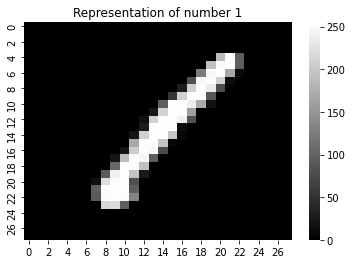

In [10]:
one_digit = train_pixels.iloc[0]
sns.heatmap(one_digit.values.reshape(28,28), cmap='gray')
plt.title('Representation of number 1')

Text(0.5, 1.0, 'Representation of number 0')

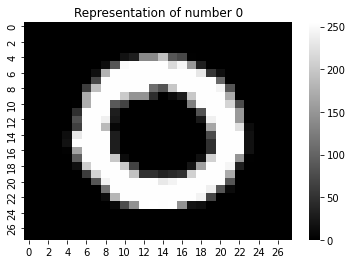

In [11]:
one_digit = train_pixels.iloc[1]
sns.heatmap(one_digit.values.reshape(28,28), cmap='gray')
plt.title('Representation of number 0')

Text(0.5, 1.0, 'Representation of number 4')

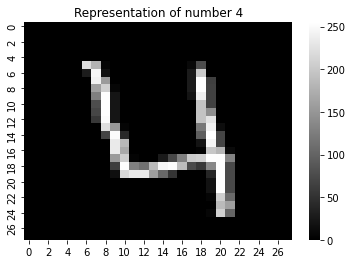

In [12]:
four_digit = train_pixels.iloc[3]
sns.heatmap(four_digit.values.reshape(28,28), cmap='gray')
plt.title('Representation of number 4')

Text(0.5, 1.0, 'Representation of number 7')

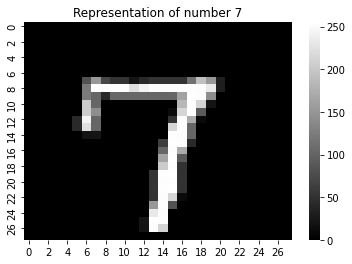

In [13]:
seven_digit = train_pixels.iloc[6]
sns.heatmap(seven_digit.values.reshape(28,28), cmap='gray')
plt.title('Representation of number 7')

# Scaling

In [14]:
scaled_train_pixels = (train_pixels / 255)
scaled_test_pixels = test_pixels / 255

# Principal Component Analysis

In [15]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)

In [16]:
pca_pixels = pca_model.fit_transform(scaled_train_pixels)

In [17]:
np.sum(pca_model.explained_variance_ratio_)

0.169092039538809

<AxesSubplot:>

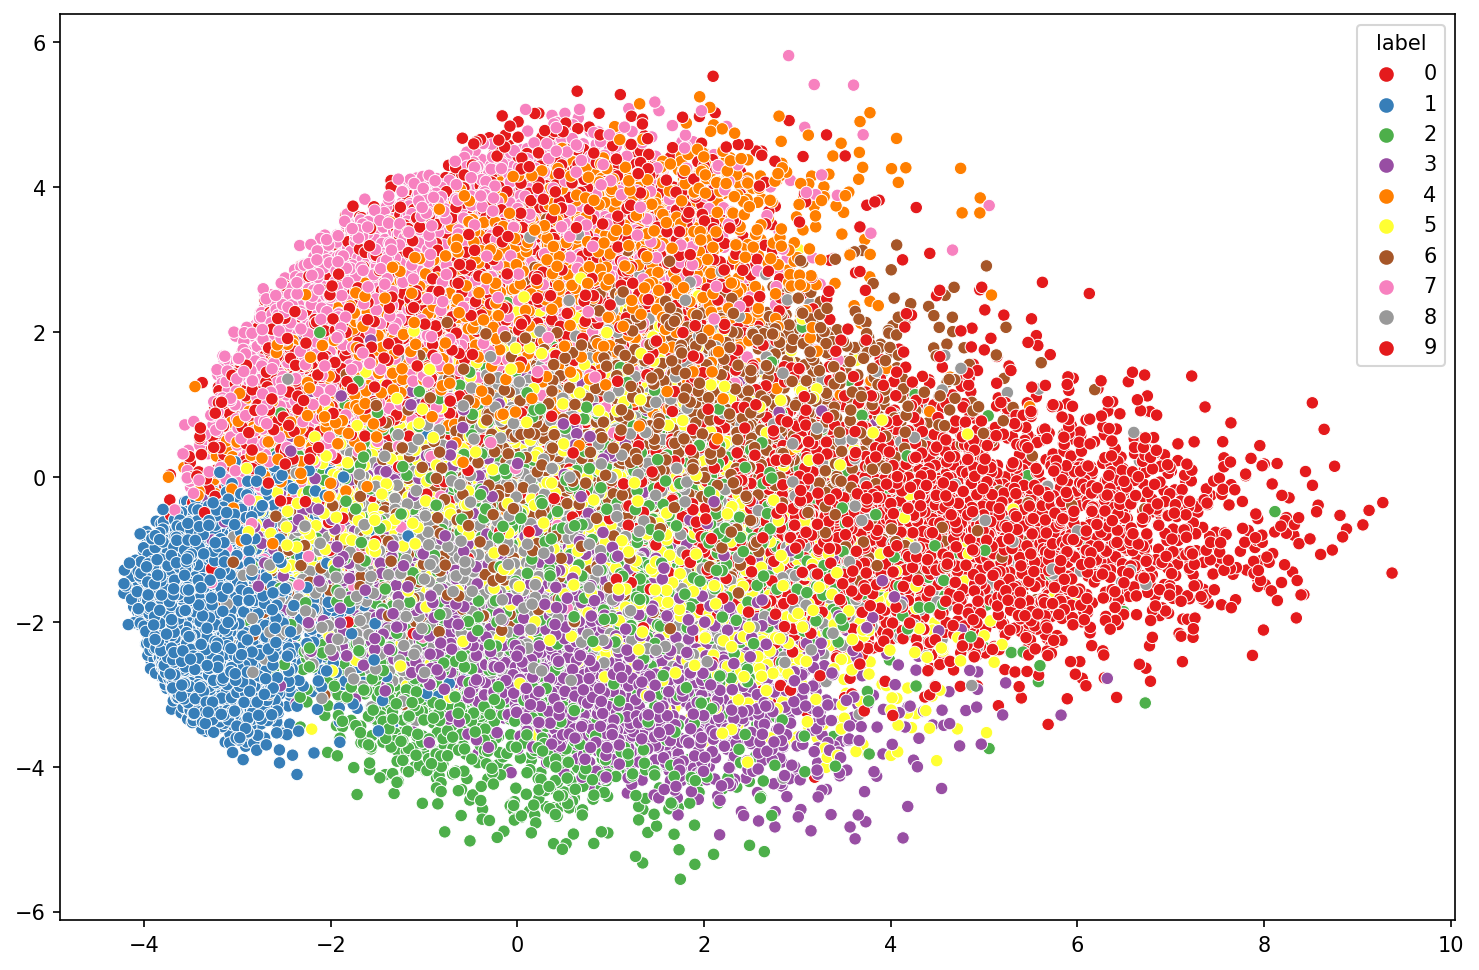

In [18]:
plt.figure(figsize=(12,8), dpi=150)
sns.scatterplot(x= pca_pixels[:,0], y=pca_pixels[:,1], hue=train_data['label'], palette='Set1')

## Train | Validation | Test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(scaled_train_pixels, label, test_size=0.1, random_state=101)

# Choosing Model

## Random Forest

In [21]:
n_estimators=[100,200]
max_features= ['sqrt', 'log2']

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features}

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state=101)
grid = GridSearchCV(rfc,param_grid)

In [23]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [24]:
grid.best_params_

{'max_features': 'sqrt', 'n_estimators': 200}

In [25]:
grid_predictions = grid.predict(X_validation)

In [30]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_validation, grid_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       409
           1       0.98      0.99      0.99       448
           2       0.95      0.96      0.96       416
           3       0.97      0.93      0.95       416
           4       0.96      0.97      0.96       411
           5       0.98      0.98      0.98       365
           6       0.97      0.99      0.98       427
           7       0.97      0.96      0.96       437
           8       0.95      0.96      0.96       416
           9       0.94      0.93      0.94       455

    accuracy                           0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200



## Gradient Boost Clasifier

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=200, max_depth=3 ,random_state=101)
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=200, random_state=101)

In [22]:
gb_predictions = gb_model.predict(X_validation)

In [25]:
print(classification_report(y_validation, gb_predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       409
           1       0.99      0.98      0.99       448
           2       0.95      0.96      0.96       416
           3       0.95      0.93      0.94       416
           4       0.93      0.97      0.95       411
           5       0.95      0.96      0.96       365
           6       1.00      0.97      0.98       427
           7       0.95      0.95      0.95       437
           8       0.95      0.95      0.95       416
           9       0.94      0.92      0.93       455

    accuracy                           0.96      4200
   macro avg       0.96      0.96      0.96      4200
weighted avg       0.96      0.96      0.96      4200



## K-Nearest Neighbours

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [28]:
test_error_rates = []


for k in range(1,15):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train)

    y_pred_validation = knn_model.predict(X_validation)

    test_error = 1 - accuracy_score(y_validation,y_pred_validation)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

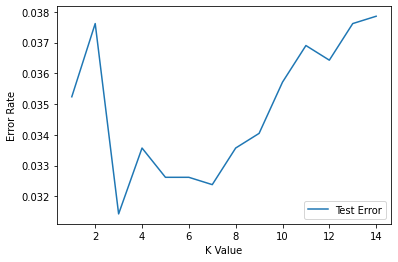

In [30]:
plt.plot(range(1,15),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [34]:
k_values = np.arange(1,20)
param_grid = {'n_neighbors': k_values}

In [36]:
knn_model = KNeighborsClassifier()
grid = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring='accuracy')

In [37]:
grid.best_params_

{'n_neighbors': 3}

In [38]:
knn_predictions = grid.predict(X_validation)

In [39]:
print(classification_report(y_validation, knn_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       409
           1       0.97      0.99      0.98       448
           2       0.98      0.97      0.97       416
           3       0.95      0.96      0.96       416
           4       0.96      0.98      0.97       411
           5       0.97      0.97      0.97       365
           6       0.98      0.99      0.98       427
           7       0.97      0.97      0.97       437
           8       0.99      0.92      0.95       416
           9       0.96      0.95      0.95       455

    accuracy                           0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200



## SVM

In [34]:
from sklearn.svm import SVC

svm = SVC(random_state=101)
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

In [35]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(random_state=101),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [38]:
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [36]:
svc_predictions = grid.predict(X_validation)

In [37]:
print(classification_report(y_validation, svc_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       409
           1       0.99      0.99      0.99       448
           2       0.97      0.98      0.97       416
           3       0.99      0.95      0.97       416
           4       0.96      0.98      0.97       411
           5       0.97      0.98      0.97       365
           6       0.98      0.99      0.99       427
           7       0.97      0.97      0.97       437
           8       0.98      0.97      0.97       416
           9       0.96      0.95      0.96       455

    accuracy                           0.98      4200
   macro avg       0.98      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200



# Xgboost

In [25]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.05)
xgb_model.fit(X_train, y_train, early_stopping_rounds=5, verbose=False, eval_set=[(X_validation, y_validation)])

c:\users\polcz\desktop\kaggle competitions\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\polcz\desktop\kaggle competitions\venv\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:25:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [28]:
xgb_predictions = xgb_model.predict(X_validation)

c:\users\polcz\desktop\kaggle competitions\venv\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [31]:
print(classification_report(y_validation, xgb_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       409
           1       0.99      0.98      0.99       448
           2       0.96      0.97      0.97       416
           3       0.96      0.94      0.95       416
           4       0.95      0.98      0.97       411
           5       0.98      0.98      0.98       365
           6       0.97      0.99      0.98       427
           7       0.96      0.95      0.96       437
           8       0.97      0.96      0.97       416
           9       0.96      0.95      0.95       455

    accuracy                           0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200



## Final Model

In [39]:
svc_model = SVC(C=1, kernel='rbf')
svc_model.fit(scaled_train_pixels, label)

SVC(C=1)

In [40]:
svc_predictions = svc_model.predict(scaled_test_pixels)

# Model Deployment

In [42]:
output = pd.DataFrame({'ImageId': np.arange(1, 28001), 'Label': svc_predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
